# Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
rcParams.update({'figure.autolayout': True})
params = {
#    'text.fontsize': 8,
   'legend.fontsize': 8,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
    'axes.labelsize':8,
#    'text.usetex': False,
#    'figure.figsize': [4.5, 4.5]
    'font.family': 'serif',
#     'font.serif': 'Times',
   }
rcParams.update(params)
a4_width = 21 - 2*2.54  # size minus margins
a4_width_in = a4_width / 2.54

In [3]:
def stylize_axes(ax, title, xlabel, ylabel, xticks, yticks, xticklabels, yticklabels, xlim, ylim):
    """Customize axes spines, title, labels, ticks, and ticklabels."""
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)

    ax.xaxis.set_tick_params(top='on', direction='in', width=1)
    ax.yaxis.set_tick_params(right='on', direction='in', width=1)
    
    ax.set_title(title)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if xticks is not None:
        ax.set_xticklabels(xticklabels)
        ax.set_xticks(xticks)
    
    if yticks is not None:
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticklabels)
        
    if xlim is not None:
        ax.set_xlim(xlim)
        
    if ylim is not None:
        ax.set_ylim(ylim)

r = 2

In [4]:
cases_folder = 'cases/'
r = 2
interpolation_points_len = 4

In [5]:
case_name = 'dual_rational_arnoldi' + '_r' + str(r) + '_K' + str(interpolation_points_len)
case_path = cases_folder + case_name
Y_fom = np.load(case_path+'/FOM.npy')
Y_rom = np.load(case_path+'/ROM.npy')
interpolation_points = np.load(case_path+'/interpolation_points.npy')
wv = np.load(case_path+'/wv.npy')


In [6]:
def transform_bode(Y):
    mag = 20*np.log10(np.abs(Y))
    ph = np.angle(Y)*180/np.pi
    return mag, ph

In [7]:
mag_rom, ph_rom = transform_bode(Y_rom)
mag_fom, ph_fom = transform_bode(Y_fom)

In [8]:
mag_error = np.abs(mag_rom - mag_fom)
ph_error = np.abs(ph_rom - ph_fom)

/home/ng213/anaconda3/envs/analysis/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/ng213/anaconda3/envs/analysis/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


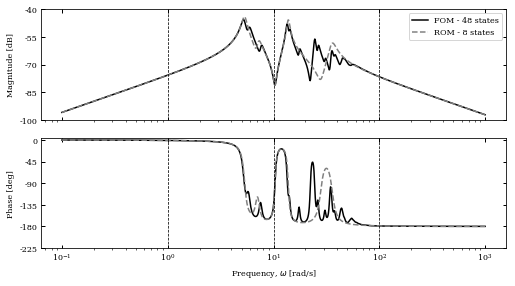

In [9]:
fig, ax = plt.subplots(nrows=2, sharex=True)
rom_color = '0.5'
width = 7.26
height = width * 9 / 16

ax[0].semilogx(wv, mag_fom, c='k', lw=1.5, label='FOM - 48 states')
ax[0].semilogx(wv, mag_rom, '--', c=rom_color, lw=1.5, label='ROM - %d states' %(r*interpolation_points_len))

ax[1].semilogx(wv, ph_fom-90, c='k', lw=1.5)
ax[1].semilogx(wv, ph_rom-90, '--', c=rom_color, lw=1.5)

ax[0].set_ylim(ax[0].get_ylim())
ax[1].set_ylim(ax[1].get_ylim())

# ax[1].set_yticks()

ax[0].legend()

stylize_axes(ax[0], '', '', 'Magnitude [dB]', 
             None, np.linspace(-40, -100, 5), 
             None, np.linspace(-40, -100, 5, dtype=int),
            None,
            (-100,-40))
stylize_axes(ax[1], '', 'Frequency, $\omega$ [rad/s]', 'Phase [deg]', 
             None, np.linspace(0, -225, 6), 
             None, np.linspace(0, -225, 6, dtype=int),
            None,
            (-225,5))


# Interpolation points
for point in interpolation_points:
    x_interp = np.array([point, point]).imag
    for axn in range(2):
        y_interp = np.array(ax[axn].get_ylim())
        ax[axn].plot(x_interp, y_interp, '--', c='k', lw=.75)

fig.set_size_inches(width, height)

plt.savefig('figures/' + case_name + '.eps',
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.01)

Text(0, 0.5, 'Magnitude, M [dB]')

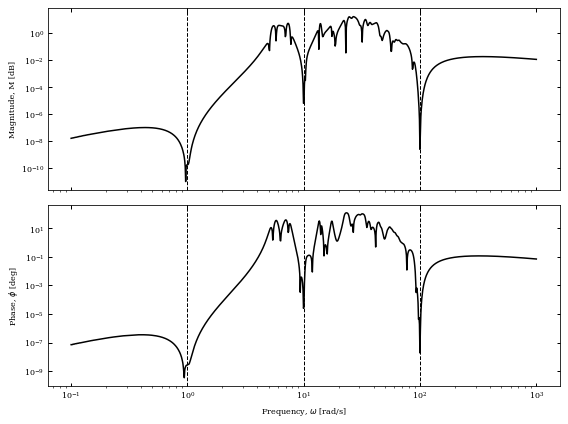

In [10]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8,6))
rom_color = 'c'

ax[0].loglog(wv, mag_error, c='k', lw=1.5)

ax[1].loglog(wv, ph_error, c='k', lw=1.5)

ax[0].set_ylim(ax[0].get_ylim())
ax[1].set_ylim(ax[1].get_ylim())

stylize_axes(ax[0], '', '', 'Magnitude [dB]', 
             None, None, 
             None, None,
            None,
            None)
stylize_axes(ax[1], '', 'Frequency, $\omega$ [rad/s]', 'Phase [deg]', 
             None, None, 
             None, None,
            None,
            None)




# Interpolation points
for point in interpolation_points:
    x_interp = np.array([point, point]).imag
    for axn in range(2):
        y_interp = np.array(ax[axn].get_ylim())
        ax[axn].plot(x_interp, y_interp, '--', c='k', lw=1.)
        
ax[1].set_xlabel('Frequency, $\omega$ [rad/s]')
ax[1].set_ylabel('Phase, $\phi$ [deg]')
ax[0].set_ylabel('Magnitude, M [dB]')

# Single Interpolation Point
## r = 8

In [13]:
cases_folder = 'cases/'
r = 8
interpolation_points_len = 1

In [14]:
case_name = 'dual_rational_arnoldi' + '_r' + str(r) + '_K' + str(interpolation_points_len)
case_path = cases_folder + case_name
Y_fom = np.load(case_path+'/FOM.npy')
Y_rom = np.load(case_path+'/ROM.npy')
interpolation_points = np.load(case_path+'/interpolation_points.npy')
wv = np.load(case_path+'/wv.npy')

In [15]:
mag_rom8, ph_rom8 = transform_bode(Y_rom)
mag_fom, ph_fom = transform_bode(Y_fom)
evals_rom8 = np.load(case_path+'/evals_rom.npy')
mag_error8 = np.abs(mag_rom8 - mag_fom)
ph_error8 = np.abs(ph_rom8 - ph_fom)

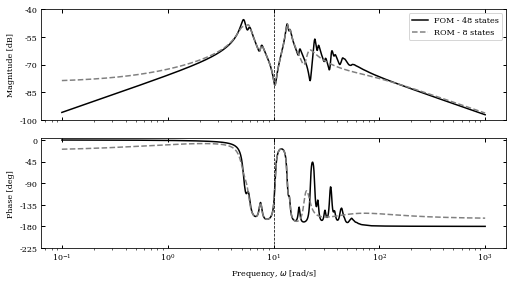

In [16]:
fig, ax = plt.subplots(nrows=2, sharex=True)
rom_color = '0.5'
width = 7.26
height = width * 9 / 16

ax[0].semilogx(wv, mag_fom, c='k', lw=1.5, label='FOM - 48 states')
ax[0].semilogx(wv, mag_rom8, '--', c=rom_color, lw=1.5, label='ROM - %d states' %(r*interpolation_points_len))

ax[1].semilogx(wv, ph_fom-90, c='k', lw=1.5)
ax[1].semilogx(wv, ph_rom8-90, '--', c=rom_color, lw=1.5)

ax[0].set_ylim(ax[0].get_ylim())
ax[1].set_ylim(ax[1].get_ylim())

# ax[1].set_yticks()

ax[0].legend()

stylize_axes(ax[0], '', '', 'Magnitude [dB]', 
             None, np.linspace(-40, -100, 5), 
             None, np.linspace(-40, -100, 5, dtype=int),
            None,
            (-100,-40))
stylize_axes(ax[1], '', 'Frequency, $\omega$ [rad/s]', 'Phase [deg]', 
             None, np.linspace(0, -225, 6), 
             None, np.linspace(0, -225, 6, dtype=int),
            None,
            (-225,5))


# Interpolation points
for point in interpolation_points:
    x_interp = np.array([point, point]).imag
    for axn in range(2):
        y_interp = np.array(ax[axn].get_ylim())
        ax[axn].plot(x_interp, y_interp, '--', c='k', lw=.75)

fig.set_size_inches(width, height)

plt.savefig('figures/' + case_name + '.eps',
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.01)

## r = 4

In [17]:
cases_folder = 'cases/'
r = 4
interpolation_points_len = 1
case_name = 'dual_rational_arnoldi' + '_r' + str(r) + '_K' + str(interpolation_points_len)
case_path = cases_folder + case_name
Y_fom = np.load(case_path+'/FOM.npy')
Y_rom = np.load(case_path+'/ROM.npy')
interpolation_points = np.load(case_path+'/interpolation_points.npy')
wv = np.load(case_path+'/wv.npy')
evals_rom4 = np.load(case_path+'/evals_rom.npy')
evals_fom = np.load(case_path+'/evals_fom.npy')
mag_rom4, ph_rom4 = transform_bode(Y_rom)
mag_fom, ph_fom = transform_bode(Y_fom)
mag_error4 = np.abs(mag_rom4 - mag_fom)
ph_error4 = np.abs(ph_rom4 - ph_fom)

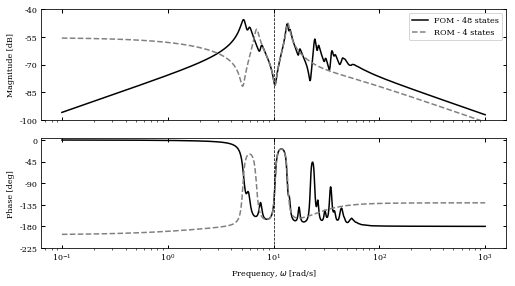

In [18]:
fig, ax = plt.subplots(nrows=2, sharex=True)
rom_color = '0.5'
width = 7.26
height = width * 9 / 16

ax[0].semilogx(wv, mag_fom, c='k', lw=1.5, label='FOM - 48 states')
ax[0].semilogx(wv, mag_rom4, '--', c=rom_color, lw=1.5, label='ROM - %d states' %(r*interpolation_points_len))

ax[1].semilogx(wv, ph_fom-90, c='k', lw=1.5)
ax[1].semilogx(wv, ph_rom4-90, '--', c=rom_color, lw=1.5)

ax[0].set_ylim(ax[0].get_ylim())
ax[1].set_ylim(ax[1].get_ylim())

# ax[1].set_yticks()

ax[0].legend()

stylize_axes(ax[0], '', '', 'Magnitude [dB]', 
             None, np.linspace(-40, -100, 5), 
             None, np.linspace(-40, -100, 5, dtype=int),
            None,
            (-100,-40))
stylize_axes(ax[1], '', 'Frequency, $\omega$ [rad/s]', 'Phase [deg]', 
             None, np.linspace(0, -225, 6), 
             None, np.linspace(0, -225, 6, dtype=int),
            None,
            (-225,5))


# Interpolation points
for point in interpolation_points:
    x_interp = np.array([point, point]).imag
    for axn in range(2):
        y_interp = np.array(ax[axn].get_ylim())
        ax[axn].plot(x_interp, y_interp, '--', c='k', lw=.75)

fig.set_size_inches(width, height)

plt.savefig('figures/' + case_name + '.eps',
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.01)

## r = 2

In [19]:
cases_folder = 'cases/'
r = 2
interpolation_points_len = 1
case_name = 'dual_rational_arnoldi' + '_r' + str(r) + '_K' + str(interpolation_points_len)
case_path = cases_folder + case_name
Y_fom = np.load(case_path+'/FOM.npy')
Y_rom = np.load(case_path+'/ROM.npy')
interpolation_points = np.load(case_path+'/interpolation_points.npy')
wv = np.load(case_path+'/wv.npy')
evals_rom2 = np.load(case_path+'/evals_rom.npy')
evals_fom = np.load(case_path+'/evals_fom.npy')
mag_rom2, ph_rom2 = transform_bode(Y_rom)
mag_fom, ph_fom = transform_bode(Y_fom)
mag_error2 = np.abs(mag_rom2 - mag_fom)
ph_error2 = np.abs(ph_rom2 - ph_fom)

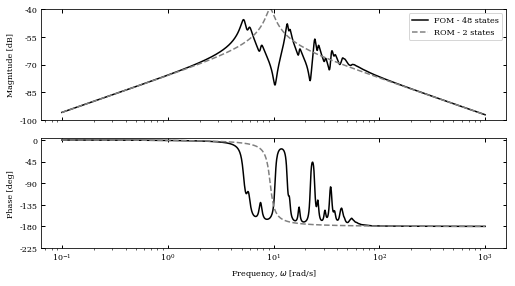

In [20]:
fig, ax = plt.subplots(nrows=2, sharex=True)
rom_color = '0.5'
width = 7.26
height = width * 9 / 16

ax[0].semilogx(wv, mag_fom, c='k', lw=1.5, label='FOM - 48 states')
ax[0].semilogx(wv, mag_rom2, '--', c=rom_color, lw=1.5, label='ROM - %d states' %(r*interpolation_points_len))

ax[1].semilogx(wv, ph_fom-90, c='k', lw=1.5)
ax[1].semilogx(wv, ph_rom2-90, '--', c=rom_color, lw=1.5)

ax[0].set_ylim(ax[0].get_ylim())
ax[1].set_ylim(ax[1].get_ylim())

# ax[1].set_yticks()

ax[0].legend()

stylize_axes(ax[0], '', '', 'Magnitude [dB]', 
             None, np.linspace(-40, -100, 5), 
             None, np.linspace(-40, -100, 5, dtype=int),
            None,
            (-100,-40))
stylize_axes(ax[1], '', 'Frequency, $\omega$ [rad/s]', 'Phase [deg]', 
             None, np.linspace(0, -225, 6), 
             None, np.linspace(0, -225, 6, dtype=int),
            None,
            (-225,5))


# Interpolation points
for point in interpolation_points:
    x_interp = np.array([point, point]).imag
    for axn in range(2):
        y_interp = np.array(ax[axn].get_ylim())
        ax[axn].plot(x_interp, y_interp, '--', c='k', lw=.75)

fig.set_size_inches(width, height)

plt.savefig('figures/' + case_name + '.eps',
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.01)

## r = 6

In [21]:
cases_folder = 'cases/'
r = 6
interpolation_points_len = 1
case_name = 'dual_rational_arnoldi' + '_r' + str(r) + '_K' + str(interpolation_points_len)
case_path = cases_folder + case_name
Y_fom = np.load(case_path+'/FOM.npy')
Y_rom = np.load(case_path+'/ROM.npy')
interpolation_points = np.load(case_path+'/interpolation_points.npy')
evals_rom6 = np.load(case_path+'/evals_rom.npy')
evals_fom = np.load(case_path+'/evals_fom.npy')
wv = np.load(case_path+'/wv.npy')
mag_rom6, ph_rom6 = transform_bode(Y_rom)
mag_fom, ph_fom = transform_bode(Y_fom)
mag_error6 = np.abs(mag_rom6 - mag_fom)
ph_error6 = np.abs(ph_rom6 - ph_fom)

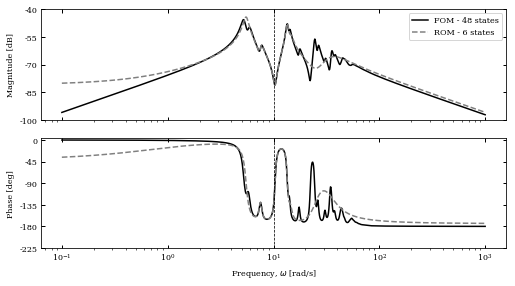

In [22]:
fig, ax = plt.subplots(nrows=2, sharex=True)
rom_color = '0.5'
width = 7.26
height = width * 9 / 16

ax[0].semilogx(wv, mag_fom, c='k', lw=1.5, label='FOM - 48 states')
ax[0].semilogx(wv, mag_rom6, '--', c=rom_color, lw=1.5, label='ROM - %d states' %(r*interpolation_points_len))

ax[1].semilogx(wv, ph_fom-90, c='k', lw=1.5)
ax[1].semilogx(wv, ph_rom6-90, '--', c=rom_color, lw=1.5)

ax[0].set_ylim(ax[0].get_ylim())
ax[1].set_ylim(ax[1].get_ylim())

# ax[1].set_yticks()

ax[0].legend()

stylize_axes(ax[0], '', '', 'Magnitude [dB]', 
             None, np.linspace(-40, -100, 5), 
             None, np.linspace(-40, -100, 5, dtype=int),
            None,
            (-100,-40))
stylize_axes(ax[1], '', 'Frequency, $\omega$ [rad/s]', 'Phase [deg]', 
             None, np.linspace(0, -225, 6), 
             None, np.linspace(0, -225, 6, dtype=int),
            None,
            (-225,5))


# Interpolation points
for point in interpolation_points:
    x_interp = np.array([point, point]).imag
    for axn in range(2):
        y_interp = np.array(ax[axn].get_ylim())
        ax[axn].plot(x_interp, y_interp, '--', c='k', lw=.75)

fig.set_size_inches(width, height)

plt.savefig('figures/' + case_name + '.eps',
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.01)

r = 1

In [23]:
cases_folder = 'cases/'
r = 1
interpolation_points_len = 1
case_name = 'dual_rational_arnoldi' + '_r' + str(r) + '_K' + str(interpolation_points_len)
case_path = cases_folder + case_name
Y_fom = np.load(case_path+'/FOM.npy')
Y_rom = np.load(case_path+'/ROM.npy')
interpolation_points = np.load(case_path+'/interpolation_points.npy')
wv = np.load(case_path+'/wv.npy')
mag_rom1, ph_rom1 = transform_bode(Y_rom)
mag_fom, ph_fom = transform_bode(Y_fom)
mag_error1 = np.abs(mag_rom1 - mag_fom)
ph_error1 = np.abs(ph_rom1 - ph_fom)

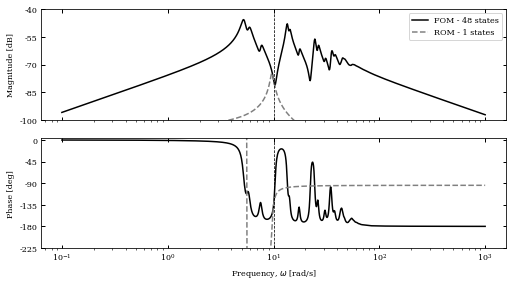

In [24]:
fig, ax = plt.subplots(nrows=2, sharex=True)
rom_color = '0.5'
width = 7.26
height = width * 9 / 16

ax[0].semilogx(wv, mag_fom, c='k', lw=1.5, label='FOM - 48 states')
ax[0].semilogx(wv, mag_rom1, '--', c=rom_color, lw=1.5, label='ROM - %d states' %(r*interpolation_points_len))

ax[1].semilogx(wv, ph_fom-90, c='k', lw=1.5)
ax[1].semilogx(wv, ph_rom1-90, '--', c=rom_color, lw=1.5)

ax[0].set_ylim(ax[0].get_ylim())
ax[1].set_ylim(ax[1].get_ylim())

# ax[1].set_yticks()

ax[0].legend()

stylize_axes(ax[0], '', '', 'Magnitude [dB]', 
             None, np.linspace(-40, -100, 5), 
             None, np.linspace(-40, -100, 5, dtype=int),
            None,
            (-100,-40))
stylize_axes(ax[1], '', 'Frequency, $\omega$ [rad/s]', 'Phase [deg]', 
             None, np.linspace(0, -225, 6), 
             None, np.linspace(0, -225, 6, dtype=int),
            None,
            (-225,5))


# Interpolation points
for point in interpolation_points:
    x_interp = np.array([point, point]).imag
    for axn in range(2):
        y_interp = np.array(ax[axn].get_ylim())
        ax[axn].plot(x_interp, y_interp, '--', c='k', lw=.75)

fig.set_size_inches(width, height)

plt.savefig('figures/' + case_name + '.eps',
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.01)

## Combined plot

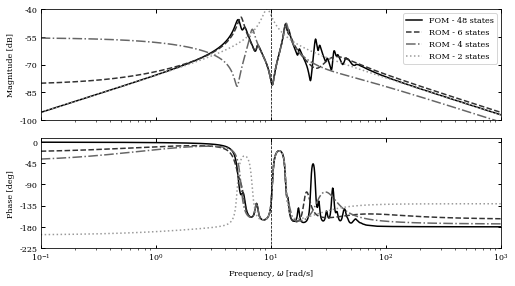

In [25]:
fig, ax = plt.subplots(nrows=2, sharex=True)
rom_color = '0.2'
rom_color2 = '0.4'
rom_color3 = '0.6'

width = 7.26
height = width * 9 / 16

ax[0].semilogx(wv, mag_fom, c='k', lw=1.5, label='FOM - 48 states')
ax[0].semilogx(wv, mag_rom6, '--', c=rom_color, lw=1.5, label='ROM - %d states' %(6))
ax[0].semilogx(wv, mag_rom4, '-.', c=rom_color2, lw=1.5, label='ROM - %d states' %(4))
ax[0].semilogx(wv, mag_rom2, ':', c=rom_color3, lw=1.5, label='ROM - %d states' %(2))

ax[1].semilogx(wv, ph_fom-90, c='k', lw=1.5)
ax[1].semilogx(wv, ph_rom8-90, '--', c=rom_color, lw=1.5)
ax[1].semilogx(wv, ph_rom6-90, '-.', c=rom_color2, lw=1.5)
ax[1].semilogx(wv, ph_rom4-90, ':', c=rom_color3, lw=1.5)

ax[0].set_ylim(ax[0].get_ylim())
ax[1].set_ylim(ax[1].get_ylim())

# ax[1].set_yticks()

ax[0].legend()

stylize_axes(ax[0], '', '', 'Magnitude [dB]', 
             None, np.linspace(-40, -100, 5), 
             None, np.linspace(-40, -100, 5, dtype=int),
            (0.1, 1000),
            (-100, -40))
stylize_axes(ax[1], '', 'Frequency, $\omega$ [rad/s]', 'Phase [deg]', 
             None, np.linspace(0, -225, 6), 
             None, np.linspace(0, -225, 6, dtype=int),
            (0.1, 1000),
            None)


# Interpolation points
for point in interpolation_points:
    x_interp = np.array([point, point]).imag
    for axn in range(2):
        y_interp = np.array(ax[axn].get_ylim())
        ax[axn].plot(x_interp, y_interp, '--', c='k', lw=.75)

fig.set_size_inches(width, height)

plt.savefig('figures/' + 'combined_single_interp' + '.eps', tight_layout=True,
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.01)

## Error Comparison

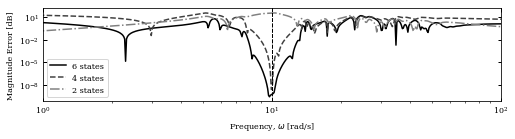

In [26]:
# fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8,6))
fig = plt.figure()
ax = fig.gca()
rom_color = 'c'

ax.loglog(wv, mag_error6, c='k', lw=1.5, label='6 states')
ax.loglog(wv, mag_error4, c='0.25', lw=1.5, ls='--', label='4 states')
ax.loglog(wv, mag_error2, c='0.5', lw=1.5, ls='-.', label='2 states')

# ax[1].loglog(wv, ph_error6, c='k', lw=1.5)
# ax[1].loglog(wv, ph_error4, c='0.25', lw=1.5, ls='--')
# ax[1].loglog(wv, ph_error2, c='0.25', lw=1.5, ls='-.')

ax.set_ylim(ax.get_ylim())
# ax[1].set_ylim(ax[1].get_ylim())

stylize_axes(ax, '', 'Frequency, $\omega$ [rad/s]', 'Magnitude Error [dB]', 
             None, None, 
             None, None,
            None,
            None)


ax.set_xlim([1, 100])
ax.legend()
# ax[1].grid()
# ax[0].grid()
# Interpolation points
for point in interpolation_points:
    x_interp = np.array([point, point]).imag
    for axn in range(2):
        y_interp = np.array(ax.get_ylim())
        ax.plot(x_interp, y_interp, '--', c='k', lw=1.)
        
width = 7.26
height = width * 9/ 16 / 2
fig.set_size_inches(width, height)
plt.savefig('figures/' + 'error_single_interpolation' + '.eps',
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.01)

# Eigenvalue comparison

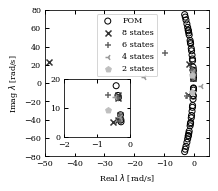

In [27]:
fig = plt.figure()
width = a4_width_in * 0.5
height = 7 / 2.54
fig.set_size_inches(width, height)
ax = fig.gca()
fig.subplots_adjust(left=.05, bottom=.01, right=.99, top=.99)
l, b, w, h = ax.get_position().bounds
# ax.set_position([0, 0, w*1.2, h*1.2])

marker_db = ['p', '3', '+', 'x', '^']

ax.scatter(evals_fom.real, evals_fom.imag, facecolor='none', edgecolor='k', marker='o', label='FOM')
ax.scatter(evals_rom8.real, evals_rom8.imag, c='0.2', marker='x', label='8 states')
ax.scatter(evals_rom6.real, evals_rom6.imag, c='0.4', marker='+', label='6 states')
ax.scatter(evals_rom4.real, evals_rom4.imag, c='0.6', marker='3', label='4 states')
ax.scatter(evals_rom2.real, evals_rom2.imag, c='0.75', marker='p', label='2 states')

axins = inset_axes(ax, width="40%", height="40%", loc=3, borderpad=2.4)
axins.scatter(evals_fom.real, evals_fom.imag, facecolor='none', edgecolor='k', marker='o', label='FOM')
axins.scatter(evals_rom8.real, evals_rom8.imag, c='0.2', marker='x', label='8 states')
axins.scatter(evals_rom6.real, evals_rom6.imag, c='0.4', marker='+', label='6 states')
axins.scatter(evals_rom4.real, evals_rom4.imag, c='0.6', marker='3', label='4 states')
axins.scatter(evals_rom2.real, evals_rom2.imag, c='0.75', marker='p', label='2 states')

stylize_axes(axins, 
            '',
            '',
            '',
            None,
            None,
            None,
            None,
            (-2,0),
            (0, 20))

stylize_axes(ax,
            '',
            'Real $\lambda$ [rad/s]',
            'Imag $\lambda$ [rad/s]',
            None, None,
            None, None,
            (-50, 5),
            (-80, 80))
ax.legend(loc=9)
plt.tight_layout()
plt.savefig('figures/' + 'eigenvalues_single_interpolation' + '.eps', dpi=300,
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.01)

## Performance

In [28]:
t2 = 0.0032393932342529297
t6 = 0.004563808441162109
t6/t2

1.4088466916905866

# Multi point interpolation

In [29]:
def extract_data(case_path, r):
    Y_fom = np.load(case_path+'/FOM.npy')
    Y_rom = np.load(case_path+'/ROM.npy')
    interpolation_points = np.load(case_path+'/interpolation_points.npy')
    wv = np.load(case_path+'/wv.npy')
    mag_rom, ph_rom = transform_bode(Y_rom)
    mag_fom, ph_fom = transform_bode(Y_fom)
    mag_error = np.abs(mag_rom1 - mag_fom)
    ph_error = np.abs(ph_rom1 - ph_fom)
    evals_rom = np.load(case_path+'/evals_rom.npy')
    evals_fom = np.load(case_path+'/evals_fom.npy')
    
    outdict = {'mag_rom': mag_rom,
              'mag_fom': mag_fom,
              'ph_rom': ph_rom,
              'ph_fom': ph_fom,
              'mag_error': mag_error,
              'ph_error': ph_error, 
              'interpolation_points': interpolation_points,
              'r':r, 
                'wv':wv,
              'evals_rom': evals_rom,
              'evals_fom': evals_fom}
    
    return outdict

In [30]:
data_db = []

for interpolation_points_len in [1, 2, 3, 4]:
    cases_folder = 'cases/'
    r = 2
#     interpolation_points_len = 1
    case_name = 'dual_rational_arnoldi' + '_r' + str(r) + '_K' + str(interpolation_points_len)
    case_path = cases_folder + case_name
    data_db.append(extract_data(case_path, r))

In [31]:
def make_bode_plot_lines(ax, data, fom=True, ls='-', rom_color='0'):
    if fom:
        ax[0].semilogx(data['wv'], data['mag_fom'], c='k', lw=1.5, label='FOM - 48 states')
        ax[1].semilogx(data['wv'], data['ph_fom']-90, c='k', lw=1.5, label='FOM - 48 states')
        
    ax[0].semilogx(data['wv'], data['mag_rom'], ls=ls, c=rom_color, lw=1.5, label='ROM - %d states' %(data['r']*len(data['interpolation_points'])))
    ax[1].semilogx(data['wv'], data['ph_rom']-90, ls=ls, c=rom_color, lw=1.5, label='ROM - %d states' %(data['r']*len(data['interpolation_points'])))

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


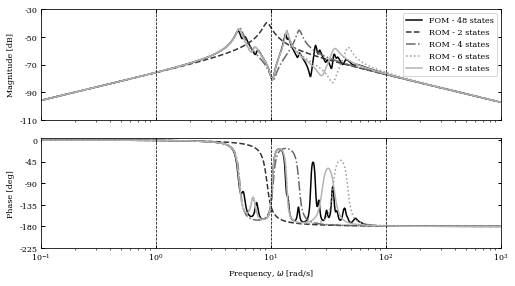

In [32]:
fig, ax = plt.subplots(nrows=2, sharex=True)
rom_color = '0.5'
width = 7.26
height = width * 9 / 16
ls_db = ['--', '-.', ':', '-']
color_db = ['0.2', '0.4', '0.6', '0.7']

i = 0
for item in data_db:
    if i == 0:
        fom = True
    else:
        fom = False
    
    print(type(item))
    make_bode_plot_lines(ax, item, fom, ls=ls_db[i], rom_color=color_db[i])
    i += 1


ax[0].set_ylim(ax[0].get_ylim())
ax[1].set_ylim(ax[1].get_ylim())

# ax[1].set_yticks()

ax[0].legend()

stylize_axes(ax[0], '', '', 'Magnitude [dB]', 
             None, np.linspace(-30, -110, 5), 
             None, np.linspace(-30, -110, 5, dtype=int),
            (0.1, 1000),
            (-110,-30))
stylize_axes(ax[1], '', 'Frequency, $\omega$ [rad/s]', 'Phase [deg]', 
             None, np.linspace(0, -225, 6), 
             None, np.linspace(0, -225, 6, dtype=int),
            (0.1, 1000),
            (-225,5))


# Interpolation points
interpolation_points = data_db[-1]['interpolation_points']
for point in interpolation_points:
    x_interp = np.array([point, point]).imag
    for axn in range(2):
        y_interp = np.array(ax[axn].get_ylim())
        ax[axn].plot(x_interp, y_interp, '--', c='k', lw=.75)

fig.set_size_inches(width, height)

plt.savefig('figures/' + 'multi_point_interpolation' + '.eps',
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.01)


## Eigenvalue comparison

In [33]:
def make_eval_scatter(ax, data, fom=True, marker='o', rom_color='0'):
    if fom:
        ax.scatter(data['evals_fom'].real, data['evals_fom'].imag, facecolor='none', edgecolor='k', marker='o', label='FOM')
    ax.scatter(data['evals_rom'].real, data['evals_rom'].imag, marker=marker, c=rom_color, label='ROM - %d states' %(data['r']*len(data['interpolation_points'])))


<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


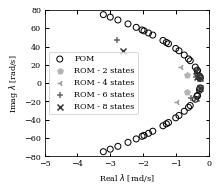

In [34]:
fig = plt.figure()
width = a4_width_in * 0.5
height = 7 / 2.54
fig.set_size_inches(width, height)
ax = fig.gca()
fig.subplots_adjust(left=.05, bottom=.01, right=.99, top=.99)
l, b, w, h = ax.get_position().bounds
color_db = ['0.2', '0.4', '0.6', '0.7'][::-1]

marker_db = ['p', '3', '+', 'x', '^']
i = 0
for item in data_db[0:]:
    if i == 0:
        fom = True
    else:
        fom = False
    
    print(type(item))
    make_eval_scatter(ax, item, fom, marker=marker_db[i], rom_color=color_db[i])
    i += 1
    
stylize_axes(ax,
            '',
            'Real $\lambda$ [rad/s]',
            'Imag $\lambda$ [rad/s]',
            None, None,
            None, None,
            (-5, 0),
            (-80, 80))
ax.legend(loc=0)
plt.tight_layout()
plt.savefig('figures/' + 'eigenvalues_multi_interpolation' + '.eps', dpi=300,
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.01)

In [35]:
t3 = 0.005239009857177734

# Sears

In [36]:
import pandas as pd
import os

In [37]:
def read_variables(file_name):
    with open(file_name, 'r') as csvfile:
        line = csv.reader(csvfile, delimiter=',')


# Discretisation
M = 16
N = 12
MstarFact = 40
nsurf = 1
rho = 1.225
c_ref = 1.8288

# Flight Conditions
u_inf = 50
alpha_deg = 0
main_ea = 0.0
AR = 3000

# Linear settings
remove_predictor = False
use_sparse = False
integration_order = 2

# ROM Settings
algorithm = 'dual_rational_arnoldi'
frequency_continuous_k = np.array([0.0])
krylov_r = 15

# Case Admin
case_route = os.path.abspath('../../01_Sears/')
results_folder = case_route + '/res/'
fig_folder = case_route + '/figs_esa/'
os.system('mkdir -p %s' % results_folder)
os.system('mkdir -p %s' % fig_folder)
case_name = 'sears_uinf%04d_AR%02d_M%dN%dMs%d_KR%d_sp%i' % (u_inf, AR, M, N, MstarFact, krylov_r, use_sparse)
#
data = pd.read_csv(results_folder + 'freq_data_' + case_name+'.csv')

Y_rom = np.zeros((len(data['kv'])))
Y_rom += data['Y_ROM_i']*1j + data['Y_ROM_r']
Y_rom *= u_inf / np.pi / 2 * np.exp(-1j*data['kv']*(-1.75/M)/0.5)

In [38]:
data.head()

,wv,kv,Y_sears_r,Y_sears_i,Y_ROM_r,Y_ROM_i,Unnamed: 6
0,0.546807,0.010000,0.981664,-0.055382,0.113060,-0.005920,NaN
1,1.636775,0.029933,0.940136,-0.125129,0.108504,-0.015530,NaN
2,2.726742,0.049867,0.897911,-0.173097,0.102926,-0.021550,NaN
3,3.816710,0.069800,0.857364,-0.208002,0.098138,-0.025723,NaN
4,4.906678,0.089733,0.819333,-0.233937,0.093725,-0.029248,NaN


In [39]:
# Y_rom = np.zeros((len(data['kv'])))
# Y_rom += data['Y_ROM_i']*1j + data['Y_ROM_r']
# Y_rom *= u_inf / np.pi / 2 * np.exp(-1j*data['kv']*(-1.75/M)/0.5)

mag_rom = np.abs(Y_rom)
ph_rom = np.angle(Y_rom)
mag_sears = (np.sqrt(data['Y_sears_r'] ** 2 + data['Y_sears_i']**2))
ph_sears = np.angle(data['Y_sears_r'] + data['Y_sears_i']*1j)

/home/ng213/anaconda3/envs/analysis/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


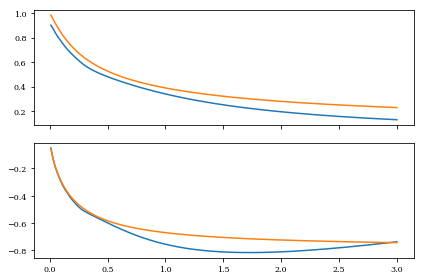

In [40]:
fig, ax = plt.subplots(nrows=2, sharex=True)
rom_color = '0.5'
width = 7.26
height = width * 9 / 16
ls_db = ['--', '-.', ':', '-']
color_db = ['0.2', '0.4', '0.6', '0.7']

ax[0].plot(data['kv'], mag_rom)
ax[0].plot(data['kv'], mag_sears)

ax[1].plot(data['kv'], ph_rom)
ax[1].plot(data['kv'], ph_sears)

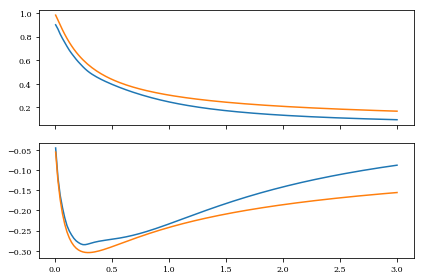

In [41]:
fig, ax = plt.subplots(nrows=2, sharex=True)
rom_color = '0.5'
width = 7.26
height = width * 9 / 16
ls_db = ['--', '-.', ':', '-']
color_db = ['0.2', '0.4', '0.6', '0.7']

ax[0].plot(data['kv'], Y_rom.real)
ax[0].plot(data['kv'], data['Y_sears_r'])

ax[1].plot(data['kv'], Y_rom.imag)
ax[1].plot(data['kv'], data['Y_sears_i'])

Stable case

In [42]:
def read_variables(file_name):
    with open(file_name, 'r') as csvfile:
        line = csv.reader(csvfile, delimiter=',')


# Discretisation
M = 16
N = 12
MstarFact = 50
nsurf = 1
rho = 1.225
c_ref = 1.8288

# Flight Conditions
u_inf = 50
alpha_deg = 0
main_ea = 0.0
AR = 4000

# Linear settings
remove_predictor = False
use_sparse = False
integration_order = 2

# ROM Settings
algorithm = 'dual_rational_arnoldi'
frequency_continuous_k = np.array([0.0])
krylov_r = 15

# Case Admin
case_route = os.path.abspath('../../01_Sears/')
results_folder = case_route + '/res/'
fig_folder = case_route + '/figs_esa/'
os.system('mkdir -p %s' % results_folder)
os.system('mkdir -p %s' % fig_folder)
case_name = 'sears_uinf%04d_AR%02d_M%dN%dMs%d_KR%d_sp%i' % (u_inf, AR, M, N, MstarFact, krylov_r, use_sparse)
#
data = pd.read_csv(results_folder + 'freq_data_' + case_name+'.csv')
data_time = pd.read_csv(results_folder + 't_dom_' + case_name+'.csv')

Y_rom = np.zeros((len(data['kv'])))
Y_rom += data['Y_ROM_i']*1j + data['Y_ROM_r']
Y_rom *= u_inf / np.pi / 2 * np.exp(-1j*data['kv']*(-1.75/M)/0.5)

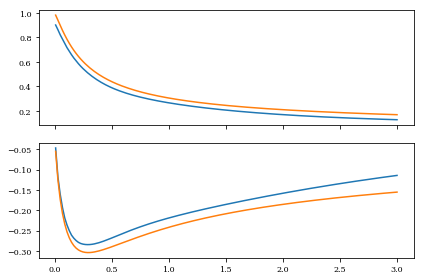

In [43]:
fig, ax = plt.subplots(nrows=2, sharex=True)
rom_color = '0.5'
width = 7.26
height = width * 9 / 16
ls_db = ['--', '-.', ':', '-']
color_db = ['0.2', '0.4', '0.6', '0.7']

ax[0].plot(data['kv'], Y_rom.real)
ax[0].plot(data['kv'], data['Y_sears_r'])

ax[1].plot(data['kv'], Y_rom.imag)
ax[1].plot(data['kv'], data['Y_sears_i'])

In [44]:
data_time.head()

,t,CL_FOM,CL_ROM,CL_sears,Unnamed: 4
0,0.000000,0.000000,0.000000,-0.037175,NaN
1,0.002286,0.000000,0.000000,-0.035103,NaN
2,0.004572,0.000000,0.000207,-0.033010,NaN
3,0.006858,0.000302,0.000593,-0.030895,NaN
4,0.009144,0.000951,0.001132,-0.028762,NaN


k = 0.2

/home/ng213/anaconda3/envs/analysis/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


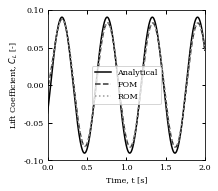

In [45]:
fig = plt.figure()
ax = fig.gca()
width = a4_width_in * 0.5
height = 7 / 2.54
rom_color = '0.5'
ls_db = ['--', '-.', ':', '-']
color_db = ['0.2', '0.4', '0.6', '0.7']

ax.plot(data_time['t'], data_time['CL_sears'], '-', c='k', lw=1.5, label='Analytical')
ax.plot(data_time['t'], data_time['CL_FOM'],'--', c='0.2', lw=1.5, label='FOM')
ax.plot(data_time['t'], data_time['CL_ROM'], ':', c='0.6', lw=1.5, label='ROM')


yticks = np.linspace(-0.1, 0.1, 5)
ytickslabel = ['%.2f' %n for n in yticks]
stylize_axes(ax,
            '',
            'Time, t [s]',
            'Lift Coefficient, $C_L$ [-]',
            None, yticks,
            None, ytickslabel,
            (0, 2),
            (-0.1, 0.1))
ax.legend(loc=0)
fig.set_size_inches(width, height)
plt.tight_layout()
plt.savefig('figures/' + 't_dom_' + case_name + 'k_02_'+'.eps', dpi=300,
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.01)

Increased discretisation

In [46]:
def read_variables(file_name):
    with open(file_name, 'r') as csvfile:
        line = csv.reader(csvfile, delimiter=',')


# Discretisation
M = 32
N = 24
MstarFact = 50
nsurf = 1
rho = 1.225
c_ref = 1.8288

# Flight Conditions
u_inf = 50
alpha_deg = 0
main_ea = 0.0
AR = 4000

n = 3*M*N + M*N*MstarFact

# Linear settings
remove_predictor = False
use_sparse = False
integration_order = 2

# ROM Settings
algorithm = 'dual_rational_arnoldi'
frequency_continuous_k = np.array([0.0])
krylov_r = 15

# Case Admin
case_route = os.path.abspath('../../01_Sears/')
results_folder = case_route + '/res/'
fig_folder = case_route + '/figs_esa/'
os.system('mkdir -p %s' % results_folder)
os.system('mkdir -p %s' % fig_folder)
case_name = 'sears_uinf%04d_AR%02d_M%dN%dMs%d_KR%d_sp%i' % (u_inf, AR, M, N, MstarFact, krylov_r, use_sparse)
#
data = pd.read_csv(results_folder + 'freq_data_' + case_name+'.csv')
data_time = pd.read_csv(results_folder + 't_dom_' + case_name+'.csv')

Y_rom = np.zeros((len(data['kv'])))
Y_rom += data['Y_ROM_i']*1j + data['Y_ROM_r']
Y_rom *= u_inf / np.pi / 2 * np.exp(-1j*data['kv']*(-1.75/M)/0.5)

mag_rom = np.abs(Y_rom)
ph_rom = np.angle(Y_rom)* 180/np.pi
mag_sears = (np.sqrt(data['Y_sears_r'] ** 2 + data['Y_sears_i']**2))
ph_sears = np.angle(data['Y_sears_r'] + data['Y_sears_i']*1j) * 180/np.pi

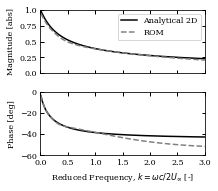

In [47]:
fig, ax = plt.subplots(nrows=2, sharex=True)
rom_color = '0.5'
width = a4_width_in * 0.5
height = 7 / 2.54
ls_db = ['--', '-.', ':', '-']
color_db = ['0.2', '0.4', '0.6', '0.7']

# ax[0].plot(data['kv'], Y_rom.real)
# ax[0].plot(data['kv'], data['Y_sears_r'])

# ax[1].plot(data['kv'], Y_rom.imag)
# ax[1].plot(data['kv'], data['Y_sears_i'])

ax[0].plot(data['kv'], mag_sears, '-', c='k', lw=1.5, label='Analytical 2D')
ax[0].plot(data['kv'], mag_rom, '--', c='0.5', lw=1.5, label='ROM')

ax[1].plot(data['kv'], ph_sears,'-', c='k', lw=1.5)
ax[1].plot(data['kv'], ph_rom, '--', c='0.5', lw=1.5)

stylize_axes(ax[0],
            '',
            '',
            'Magnitude [abs]',
            None, np.linspace(0, 1, 5),
            None, np.linspace(0, 1, 5),
            (0, 3),
            (0, 1))
stylize_axes(ax[1],
            '',
            'Reduced Frequency, $k=\omega c/2 U_\infty$ [-]',
            'Phase [deg]',
            None, None,
            None, None,
            (0, 3),
            (-60, 0))
ax[0].legend()
fig.set_size_inches(width, height)
plt.tight_layout()
plt.savefig('figures/' + 'sears_' + case_name +'.eps', dpi=300,
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.01)

In [48]:
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

In [49]:
v1.dot(v2)

32

In [65]:
def read_variables(file_name):
    with open(file_name, 'r') as csvfile:
        line = csv.reader(csvfile, delimiter=',')


# Discretisation
M = 16
N = 8
MstarFact = 100
nsurf = 1
rho = 1.225
c_ref = 1.8288

# Flight Conditions
u_inf = 50
alpha_deg = 0
main_ea = 0.0
AR = 4000

n = 3*M*N + M*N*MstarFact

# Linear settings
remove_predictor = False
use_sparse = False
integration_order = 2

# ROM Settings
algorithm = 'dual_rational_arnoldi'
frequency_continuous_k = np.array([0.0])
krylov_r = 15

# Case Admin
case_route = os.path.abspath('../../01_Sears/')
results_folder = case_route + '/res/'
fig_folder = case_route + '/figs_esa/'
os.system('mkdir -p %s' % results_folder)
os.system('mkdir -p %s' % fig_folder)
case_name = 'sears_uinf%04d_AR%02d_M%dN%dMs%d_KR%d_sp%i' % (u_inf, AR, M, N, MstarFact, krylov_r, use_sparse)
#
data = pd.read_csv(results_folder + 'freq_data_' + case_name+'.csv')
data_time = pd.read_csv(results_folder + 't_dom_' + case_name+'.csv')

Y_rom = np.zeros((len(data['kv'])))
Y_rom += data['Y_ROM_i']*1j + data['Y_ROM_r']
Y_rom *= u_inf / np.pi / 2 * np.exp(-1j*data['kv']*(-1.75/M)/0.5)
Y_fom = np.zeros((len(data['kv'])))
Y_fom += data['Y_FOM_i']*1j + data['Y_FOM_r']
Y_fom *= np.exp(-1j*data['kv']*(-1.75/M)/0.5)

mag_rom = np.abs(Y_rom)
ph_rom = np.angle(Y_rom)* 180/np.pi
mag_fom = np.abs(Y_fom)
ph_fom = np.angle(Y_fom)* 180/np.pi
mag_sears = (np.sqrt(data['Y_sears_r'] ** 2 + data['Y_sears_i']**2))
ph_sears = np.angle(data['Y_sears_r'] + data['Y_sears_i']*1j) * 180/np.pi

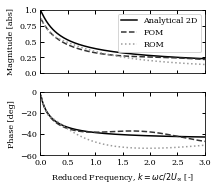

In [69]:
fig, ax = plt.subplots(nrows=2, sharex=True)
rom_color = '0.5'
width = a4_width_in * 0.5
height = 7 / 2.54
ls_db = ['--', '-.', ':', '-']
color_db = ['0.2', '0.4', '0.6', '0.7']

# ax[0].plot(data['kv'], Y_rom.real)
# ax[0].plot(data['kv'], Y_fom.real)
# ax[0].plot(data['kv'], data['Y_sears_r'])

# ax[1].plot(data['kv'], Y_rom.imag)
# ax[1].plot(data['kv'], Y_fom.imag)

# ax[1].plot(data['kv'], data['Y_sears_i'])

ax[0].plot(data['kv'], mag_sears, '-', c='k', lw=1.5, label='Analytical 2D')
ax[0].plot(data['kv'], mag_fom, '--', c='0.2', lw=1.5, label='FOM')
ax[0].plot(data['kv'], mag_rom, ':', c='0.6', lw=1.5, label='ROM')

ax[1].plot(data['kv'], ph_sears,'-', c='k', lw=1.5)
ax[1].plot(data['kv'], ph_fom, '--', c='0.2', lw=1.5, label='FOM')
ax[1].plot(data['kv'], ph_rom, ':', c='0.6', lw=1.5, label='ROM')


stylize_axes(ax[0],
            '',
            '',
            'Magnitude [abs]',
            None, np.linspace(0, 1, 5),
            None, np.linspace(0, 1, 5),
            (0, 3),
            (0, 1))
stylize_axes(ax[1],
            '',
            'Reduced Frequency, $k=\omega c/2 U_\infty$ [-]',
            'Phase [deg]',
            None, None,
            None, None,
            (0, 3),
            (-60, 0))
ax[0].legend()
fig.set_size_inches(width, height)
plt.tight_layout()
plt.savefig('figures/' + 'sears_' + case_name +'.eps', dpi=300,
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.01)

In [70]:
n

13184